In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm

In [2]:
# Read the csv file into a pandas DataFrame

data_allyears = pd.read_csv('resources/OECD_Happiness_Merge_Dataframes.csv')
data_allyears.head()

,Dataset,COU,Country,Year,Description,Value,Unit,Life Ladder,Log GDP per capita,Social support,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Avg. Work Hours (Annual),AUS,Australia,2005,Total employment,1732.26000,Hours,7.340688,10.569470,0.967892,...,NaN,0.34275,NaN,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.51814
1,Avg. Wages (Annual),AUS,Australia,2005,In 2018 constant prices at 2018 USD PPPs,48891.30501,USD,7.340688,10.569470,0.967892,...,NaN,0.34275,NaN,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.51814
2,Avg. Work Hours (Annual),AUS,Australia,2007,Total employment,1722.64000,Hours,7.285391,10.613497,0.965276,...,NaN,0.34275,NaN,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.51814
3,Avg. Wages (Annual),AUS,Australia,2007,In 2018 constant prices at 2018 USD PPPs,50565.39819,USD,7.285391,10.613497,0.965276,...,NaN,0.34275,NaN,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.51814
4,Mortality Causes,AUS,Australia,2007,All causes of death,137854.00000,NBPOPUPC,7.285391,10.613497,0.965276,...,NaN,0.34275,NaN,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.51814


In [3]:
data_allyears.isnull().sum()

Dataset                                                        0
COU                                                            0
Country                                                        0
Year                                                           0
Description                                                    0
Value                                                          0
Unit                                                           0
Life Ladder                                                    0
Log GDP per capita                                             0
Social support                                                 6
Healthy life expectancy at birth                               0
Freedom to make life choices                                   0
Generosity                                                    62
Perceptions of corruption                                      6
Positive affect                                                0
Negative affect          

In [5]:
data_allyears.dtypes

Dataset                                                      object
COU                                                          object
Country                                                      object
Year                                                          int64
Description                                                  object
Value                                                       float64
Unit                                                         object
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                 

In [6]:
data_allyears.columns

Index(['Dataset', 'COU', 'Country', 'Year', 'Description', 'Value', 'Unit',
       'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS roun

In [7]:
data_allyears.isnull().sum()

Dataset                                                        0
COU                                                            0
Country                                                        0
Year                                                           0
Description                                                    0
Value                                                          0
Unit                                                           0
Life Ladder                                                    0
Log GDP per capita                                             0
Social support                                                 6
Healthy life expectancy at birth                               0
Freedom to make life choices                                   0
Generosity                                                    62
Perceptions of corruption                                      6
Positive affect                                                0
Negative affect          

In [17]:
### Pick out only rows with the specified columns
data_sliced_df = data_allyears[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Confidence in national government', 'GINI index (World Bank estimate), average 2000-16', 'Life Ladder']]

### Fix the dataframe by dropping null values
data_allyears_clean = data_sliced_df.dropna()

### Determine our X and y dataframes
X = data_allyears_clean[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Confidence in national government', 'GINI index (World Bank estimate), average 2000-16']]
y = data_allyears_clean[['Life Ladder']].values.reshape(-1, 1)
print(X.shape, y.shape)

(1039, 8) (1039, 1)


In [9]:
# check to NaN/null values
X.isnull().sum()

Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Confidence in national government                    0
GINI index (World Bank estimate), average 2000-16    0
dtype: int64

In [10]:
# Scale data down to standardize data set and avoid errors
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

In [11]:
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

In [12]:
# Test-print scaled set
y_scaled

array([[ 0.81510684],
       [ 0.81510684],
       [ 0.81510684],
       ...,
       [-0.00744031],
       [-0.1985992 ],
       [-0.2727759 ]])

In [13]:
model = sm.OLS(y_scaled, X_scaled).fit()
predictions = model.predict(X_scaled)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     368.1
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          6.67e-296
Time:                        17:59:36   Log-Likelihood:                -773.15
No. Observations:                1039   AIC:                             1562.
Df Residuals:                    1031   BIC:                             1602.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0291      0.031     -0.926      0.355      -0.091       0.033
x2             0.1562      0.023      6.686      0.000       0.110       0.202
x3             0.2699      0.022     12.284      0.000       0.227       0.313
x4             0.1791      0.028      6.481      0.000       0.125       0.233
x5             0.2488      0.023     10.597      0.000       0.203       0.295
x6            -0.2486      0.032     -7.749      0.000      -0.312      -0.186
x7             0.1242      0.027      4.548      0.000       0.071       0.178
x8             0.1764      0.025      7.177      0.000       0.128       0.225
==============================================================================
Omnibus:                        7.208   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                9.561
Skew:                          -0.036   Prob(JB):                      0.00839
Kurtosis:                       3.464   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
len(predictions)

1039

In [15]:
len(y_scaled)

1039

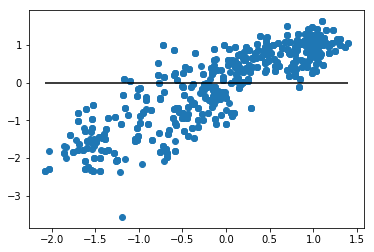

In [16]:
# Check predictions by visualizing residuals -> differences between the actual values of y, and the predictions
plt.scatter(predictions, y_scaled)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()